In [1]:
# Import necessary libraries
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections # for most_common method of Counter class

In [2]:
# Connect to SQL server and connect to Books table. Assign the table data to a pandas DataFrame.
Server = 'DESKTOP-13K0I1P'
try:
    sqlServerConnection = pyodbc.connect('Driver={SQL Server};'
                      f'Server={Server};'
                      'Database=Books;'
                      'Trusted_Connection=yes;')
    SQL_read_query = pd.read_sql_query('SELECT * FROM Books', sqlServerConnection)

    # Create cursor connection to db
    df = pd.DataFrame(SQL_read_query, columns=['title', 'price', 'in_stock', 'rating', 'genre', 'upc', 'description'])
    print("The Books database from SqlServer is connected. Completing reading Books table.")
except pyodbc.Error as error:
    print("Error while connecting to SqlServer - ", error)
finally:
    if sqlServerConnection:
        sqlServerConnection.close()
        print("The SqlServer connection is closed")


The Books database from SqlServer is connected. Completing reading Books table.
The SqlServer connection is closed


In [3]:
df.head()

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [ ]:
df1 = df[['upc','description']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1000 non-null   object 
 1   price        1000 non-null   float64
 2   in_stock     1000 non-null   int64  
 3   rating       1000 non-null   object 
 4   genre        1000 non-null   object 
 5   upc          1000 non-null   object 
 6   description  1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [5]:
# Relevant numerical column
numerical_columns = ['price','in_stock']
categorical_columns = ['rating','genre']

In [6]:
# Descriptive analysis for numerical columns
df.describe()

,price,in_stock
count,1000.000000,1000.000000
mean,35.070350,8.585000
std,14.446690,5.654622
min,10.000000,1.000000
25%,22.107501,3.000000
50%,35.980000,7.000000
75%,47.457499,14.000000
max,59.990002,22.000000


---- 5 unique values in rating
['three' 'one' 'four' 'five' 'two']
---- 50 unique values in genre
['Poetry' 'Historical Fiction' 'Fiction' 'Mystery' 'History' 'Young Adult'
 'Business' 'Default' 'Sequential Art' 'Music' 'Science Fiction'
 'Politics' 'Travel' 'Thriller' 'Food and Drink' 'Romance' 'Childrens'
 'Nonfiction' 'Art' 'Spirituality' 'Philosophy' 'New Adult' 'Contemporary'
 'Fantasy' 'Add a comment' 'Science' 'Health' 'Horror' 'Self Help'
 'Religion' 'Christian' 'Crime' 'Autobiography' 'Christian Fiction'
 'Biography' 'Womens Fiction' 'Erotica' 'Cultural' 'Psychology' 'Humor'
 'Historical' 'Novels' 'Short Stories' 'Suspense' 'Classics' 'Academic'
 'Sports and Games' 'Adult Fiction' 'Parenting' 'Paranormal']


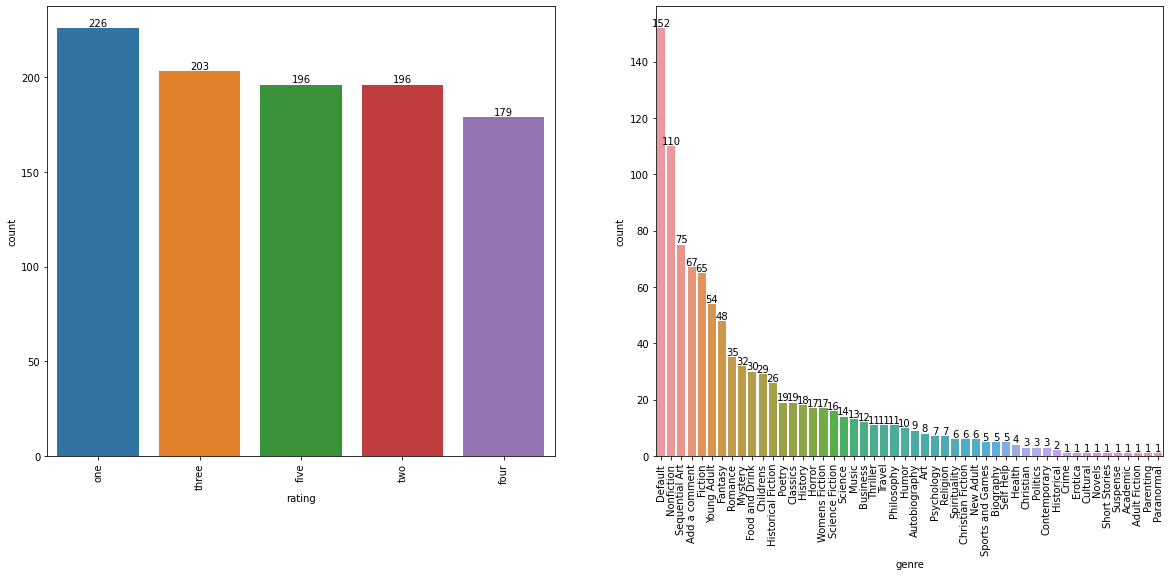

In [13]:
# Unique values in categorical columns
fig, axs = plt.subplots(ncols=2,figsize=(20, 8.27))
for index,column in enumerate(categorical_columns):
    print('---- ' + str(len(df[column].unique())) + ' unique values in ' + column  )
    print(df[column].unique())
    chart = sns.countplot(x=df[column],ax=axs[index],order=df[column].value_counts().index)
    chart.bar_label(chart.containers[0])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [8]:
# Count unique titles
len(df['title'].unique())

999

In [9]:
count_genre =  pd.crosstab(index=df['genre'], columns='freq')
count_genre

col_0,freq
genre,
Academic,1
Add a comment,67
Adult Fiction,1
Art,8
Autobiography,9
Biography,5
Business,12
Childrens,29
Christian,3
